In [16]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

df = pd.read_csv('data/data.csv')

df.head()

,Unnamed: 0,id,bathrooms,bedrooms,fee,price,square_feet,cityname,state,latitude,longitude,date,price_per_square_ft
0,0,5668640009,1.0,1.0,No,2195.0,542,Redondo Beach,CA,33.8520,-118.3759,2019-12-26,4.049815
1,1,5668639818,1.5,3.0,No,1250.0,1500,Newport News,VA,37.0867,-76.4941,2019-12-26,0.833333
2,2,5668639686,2.0,3.0,No,1395.0,1650,Raleigh,NC,35.8230,-78.6438,2019-12-26,0.845455
3,3,5668639659,1.0,2.0,No,1600.0,820,Vacaville,CA,38.3622,-121.9712,2019-12-26,1.951220
4,4,5668639374,1.0,1.0,No,975.0,624,Albuquerque,NM,35.1038,-106.6110,2019-12-26,1.562500


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99004 entries, 0 to 99003
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           99004 non-null  int64  
 1   id                   99004 non-null  int64  
 2   bathrooms            99004 non-null  float64
 3   bedrooms             99004 non-null  float64
 4   fee                  99004 non-null  object 
 5   price                99004 non-null  float64
 6   square_feet          99004 non-null  int64  
 7   cityname             99004 non-null  object 
 8   state                99004 non-null  object 
 9   latitude             99004 non-null  float64
 10  longitude            99004 non-null  float64
 11  date                 99004 non-null  object 
 12  price_per_square_ft  99004 non-null  float64
dtypes: float64(6), int64(3), object(4)
memory usage: 9.8+ MB


In [18]:
##pulling info for potentially interesting regressions to compare

In [19]:
df.state.unique()

array(['CA', 'VA', 'NC', 'NM', 'CO', 'WV', 'GA', 'MA', 'DC', 'AZ', 'IA',
       'WA', 'TX', 'IL', 'MS', 'OR', 'FL', 'MO', 'PA', 'WI', 'OK', 'UT',
       'RI', 'NJ', 'IN', 'MD', 'OH', 'TN', 'ND', 'NE', 'AR', 'MI', 'MN',
       'HI', 'ID', 'SC', 'KS', 'AL', 'SD', 'NY', 'KY', 'LA', 'AK', 'CT',
       'NV', 'WY', 'VT', 'NH', 'MT', 'DE', 'ME'], dtype=object)

In [20]:
df['price_per_square_ft'].nunique()

63315

In [21]:
df.bedrooms.unique()

array([1., 3., 2., 4., 0., 5., 7., 8., 6., 9.])

In [22]:
##which state has the most info?

df.state.value_counts().head(15)

state
TX    11236
CA    10254
VA     8281
NC     6298
CO     6280
FL     5768
MD     5276
MA     5026
OH     4902
GA     4752
NJ     4442
NV     2812
WA     2593
AZ     2375
LA     1344
Name: count, dtype: int64

In [23]:
avg_bath_price = df.groupby('bathrooms').agg({'price' : 'mean'})
avg_bath_price

,price
bathrooms,
1.0,1336.463604
1.5,1393.303701
2.0,1728.899671
2.5,2097.802224
3.0,2803.398649
3.5,2907.652174
4.0,4666.957983
4.5,5138.666667
5.0,9692.500000


In [24]:
avg_bed_price = df.groupby('bedrooms').agg({'price' : 'mean'})
avg_bed_price

,price
bedrooms,
0.0,1409.609302
1.0,1344.456798
2.0,1578.172468
3.0,1791.584054
4.0,2349.959115
5.0,3524.179577
6.0,7567.934783
7.0,14263.750000
8.0,5015.000000


In [25]:
##finding the regression

x_values = avg_bed_price.index
y_values = avg_bed_price['price']

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

<function matplotlib.pyplot.show(close=None, block=None)>

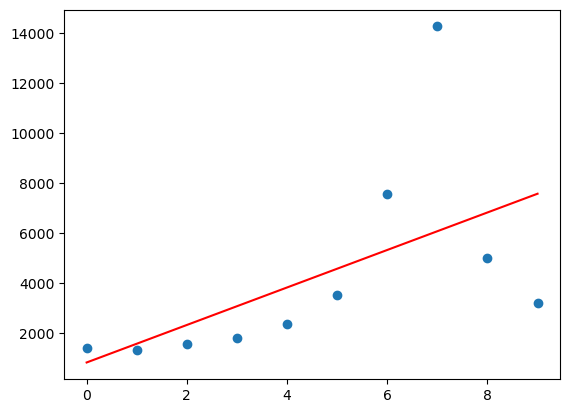

In [26]:
##adding the regression line

plt.scatter(avg_bed_price.index, avg_bed_price.price)
plt.plot(x_values, intercept + slope * x_values, label='Regression Line', color='red')

plt.show

In [27]:
##finding the regression

x_values = avg_bath_price.index
y_values = avg_bath_price['price']

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

<function matplotlib.pyplot.show(close=None, block=None)>

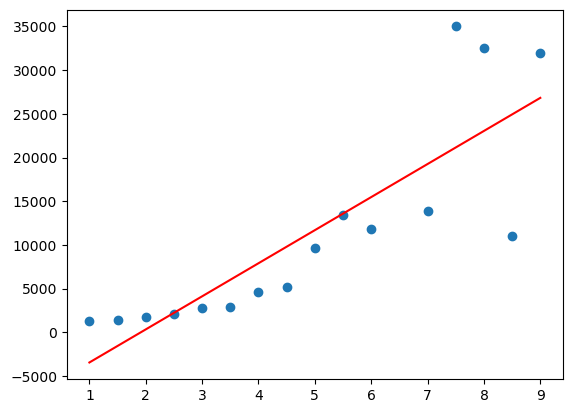

In [28]:
##adding the regression line

plt.scatter(avg_bath_price.index, avg_bath_price.price)
plt.plot(x_values, intercept + slope * x_values, label='Regression Line', color='red')

plt.show

<Axes: xlabel='price', ylabel='square_feet'>

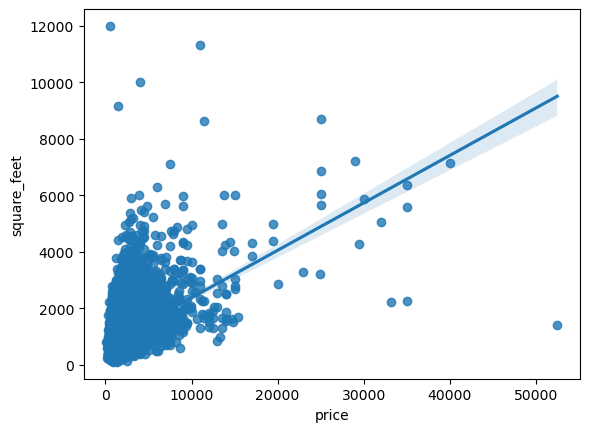

In [29]:
sns.regplot(data = df, x='price', y='square_feet')

<Axes: xlabel='price', ylabel='bedrooms'>

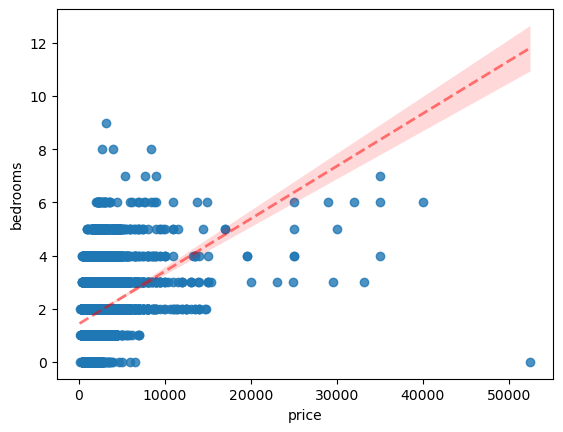

In [30]:
sns.regplot(data = df, x='price', y='bedrooms', line_kws={"alpha" : 0.5, "color": "red", "lw": 2, "ls": "--"})

<Axes: xlabel='price', ylabel='latitude'>

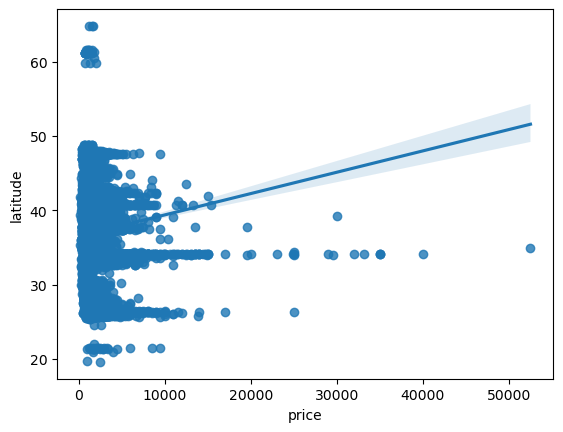

In [31]:
sns.regplot(data = df, x='price', y='latitude')

<Axes: xlabel='price', ylabel='longitude'>

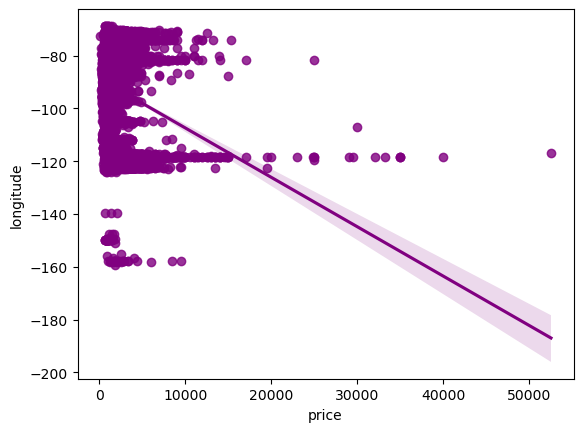

In [32]:
sns.regplot(data = df, x='price', y='longitude', color = 'purple')

<Axes: xlabel='latitude', ylabel='price'>

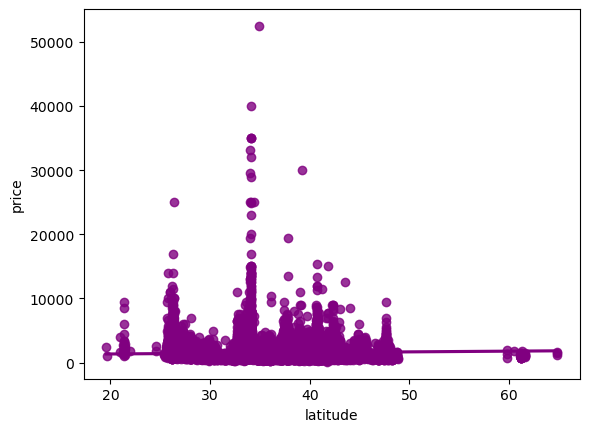

In [33]:
sns.regplot(data = df, x='latitude', y='price', color = 'purple')

<Axes: xlabel='bathrooms', ylabel='price'>

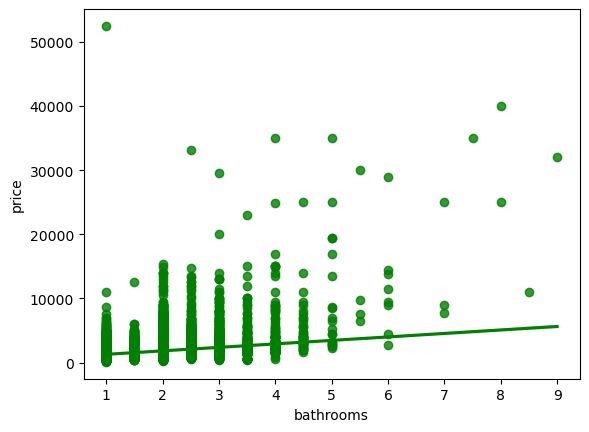

In [34]:
sns.regplot(data = df, x='bathrooms', y='price', color = 'green')

<Axes: xlabel='price', ylabel='bathrooms'>

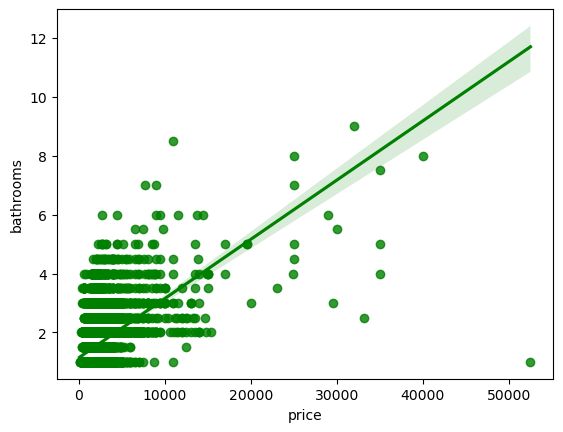

In [35]:
sns.regplot(data = df, x='price', y='bathrooms', color = 'green')

<Axes: xlabel='bedrooms', ylabel='bathrooms'>

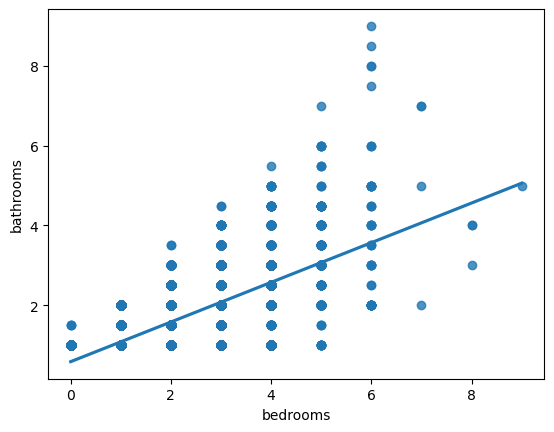

In [36]:
sns.regplot(data = df, x='bedrooms', y='bathrooms')

In [37]:
##get avg info for each state 

avg_df = df.groupby('state').agg({'price' : 'mean', 'bedrooms' : 'mean', 'price_per_square_ft' : 'mean', 'bathrooms' : 'mean', 'price_per_square_ft' : 'mean', 'square_feet' : 'mean'})
avg_df.head()

,price,bedrooms,price_per_square_ft,bathrooms,square_feet
state,,,,,
AK,1054.280702,1.701754,1.530507,1.236842,798.175439
AL,962.176136,1.917614,0.965194,1.549716,1039.599432
AR,874.367893,1.819398,0.930098,1.556856,971.740803
AZ,1120.110737,1.738947,1.270741,1.488421,913.647158
CA,2465.646187,1.663741,2.795014,1.456651,926.831090


<Axes: xlabel='bedrooms', ylabel='price'>

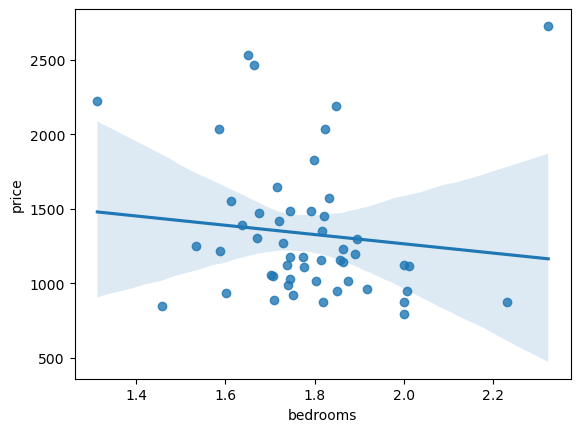

In [38]:
sns.regplot(data = avg_df, x='bedrooms', y='price')

<Axes: xlabel='price', ylabel='bedrooms'>

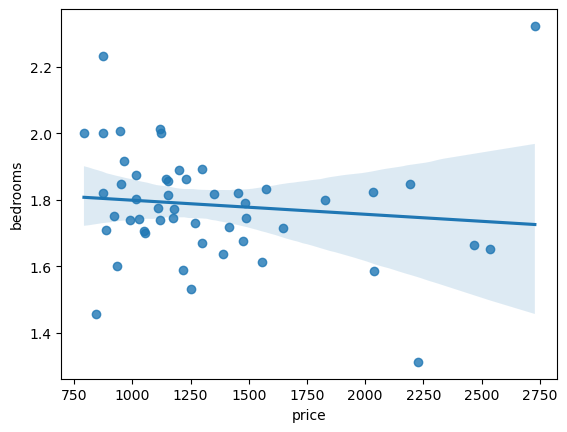

In [39]:
sns.regplot(data = avg_df, x='price', y='bedrooms')

<Axes: xlabel='price', ylabel='bathrooms'>

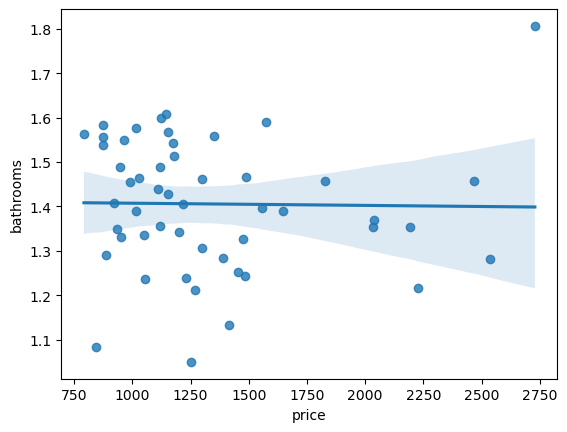

In [40]:
sns.regplot(data = avg_df, x='price', y='bathrooms')

<Axes: xlabel='price', ylabel='square_feet'>

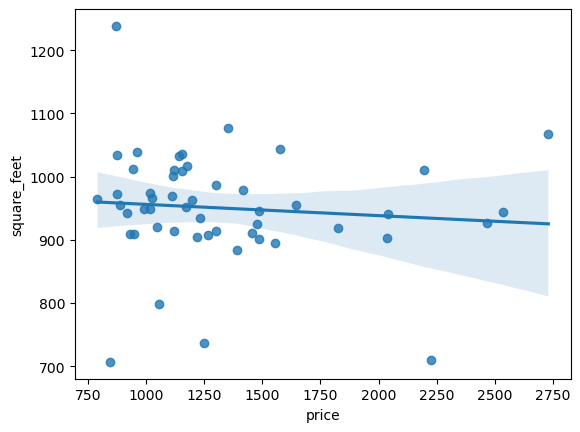

In [41]:
sns.regplot(data = avg_df, x='price', y='square_feet')

<Axes: xlabel='square_feet', ylabel='price'>

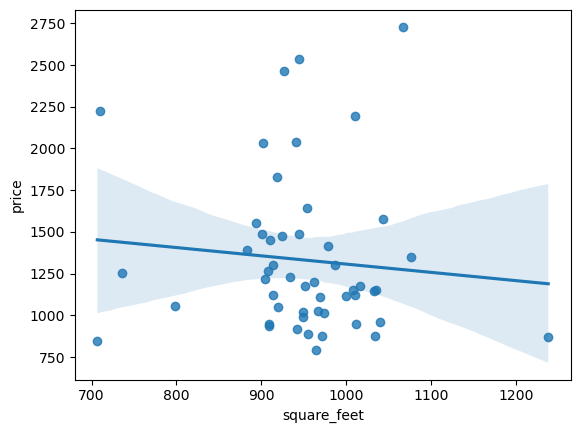

In [42]:
sns.regplot(data = avg_df, x='square_feet', y='price')

<Axes: xlabel='bathrooms', ylabel='bedrooms'>

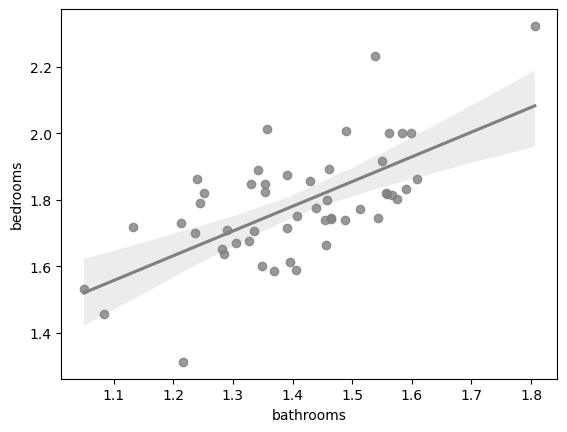

In [43]:
sns.regplot(data = avg_df, x='bathrooms', y='bedrooms', color='grey')

<Axes: xlabel='bedrooms', ylabel='bathrooms'>

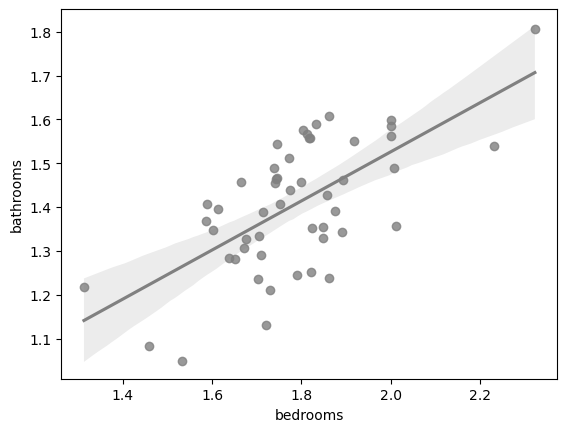

In [44]:
sns.regplot(data = avg_df, x='bedrooms', y='bathrooms', color='grey')

<Axes: xlabel='bathrooms', ylabel='price'>

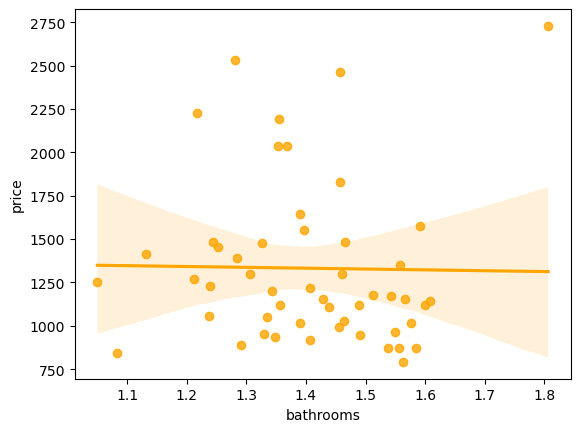

In [45]:
sns.regplot(data = avg_df, x='bathrooms', y='price', color='orange')

In [46]:
df_copy = df.copy()

In [47]:
avg_dates = df_copy.groupby('date').agg({'price' : 'mean', 'square_feet' : 'mean', 'price_per_square_ft' : 'mean'}).reset_index()
avg_dates.head()

,date,price,square_feet,price_per_square_ft
0,2018-12-07,1608.080870,949.143248,1.796380
1,2018-12-08,1439.190149,972.022038,1.574987
2,2018-12-09,1557.500000,1036.500000,1.609795
3,2018-12-10,1450.000000,1032.800000,1.660119
4,2018-12-11,1387.500000,700.000000,1.975666


In [48]:
avg_dates['date'].nunique()

329

<Axes: xlabel='price', ylabel='square_feet'>

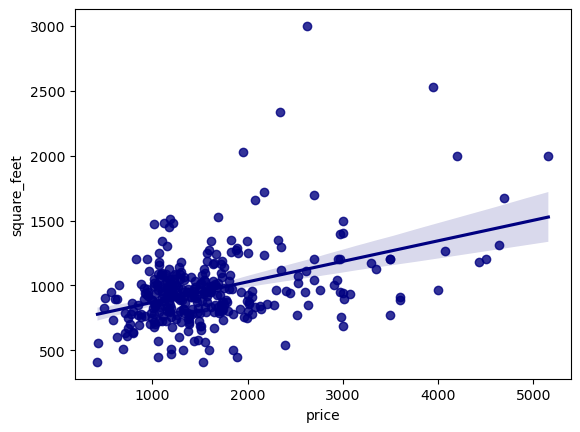

In [49]:
sns.regplot(data = avg_dates, x='price', y='square_feet', color='navy')

<Axes: xlabel='square_feet', ylabel='price'>

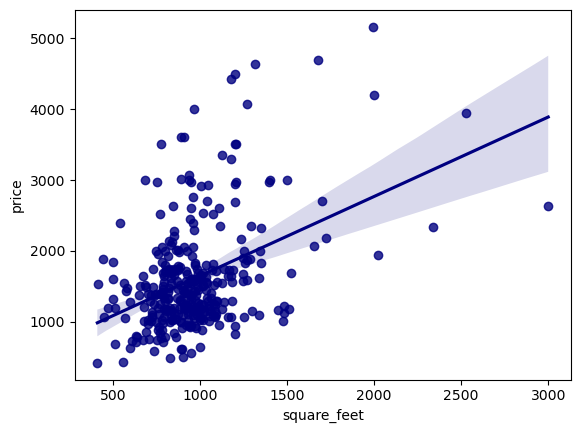

In [50]:
sns.regplot(data = avg_dates, x='square_feet', y='price', color='navy')

UFuncTypeError: ufunc 'multiply' did not contain a loop with signature matching types (dtype('<U10'), dtype('float64')) -> None

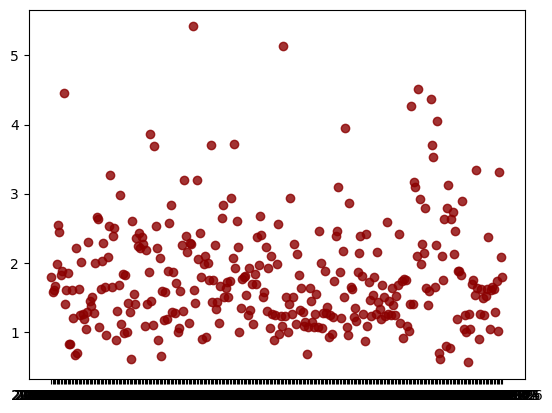

In [51]:

sns.regplot(data = avg_dates, x='date', y='price_per_square_ft', color='darkred')

In [ ]:
##potential main idea for regression: which has the most evident correlation with price

In [ ]:
##should i get rid of the major outlier?